# 数据集 Oakland Crime Statistics处理

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

## 数据集导入以及数据处理

In [97]:
df=pd.read_csv("/home/wangguoyu910/conda_dataset/crime/records-for-2011.csv")

In [98]:
df.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  object 
 2   Location                   180016 non-null  object 
 3   Area Id                    179112 non-null  float64
 4   Beat                       179496 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  object 
dtypes: float64(2), object(8)
memory usage: 13.7+ MB


#### 原数据中都是标称属性，没有数值属性，因此这里根据开始时间和关闭时间生成持续时间，作为数值属性

In [100]:
df['Time_Created'] =  pd.to_datetime(df['Create Time'], format='%Y-%m-%dT%H:%M:%S')
df['Time_Closed'] =  pd.to_datetime(df['Closed Time'], format='%Y-%m-%dT%H:%M:%S')
df["Time_to_resolve"] = df['Time_Closed'] - new['Time_Created']
df["Time_to_resolve"] = df["Time_to_resolve"].dt.total_seconds()

#### Agency仅包含一种种类，因此可以直接除去

In [102]:
print(df['Agency'].value_counts())
df.drop(columns=['Agency'],inplace=True)

OP    180015
Name: Agency, dtype: int64


#### 时间相关信息我们仅需要持续时间，事件编号是一个独一无二的ID也不需要，因此除去这些列

In [103]:
df.drop(columns=['Create Time','Event Number','Closed Time','Time_Created','Time_Closed'],inplace=True)

#### 观察处理后的数据信息

In [104]:
df.head()

,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Time_to_resolve
0,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,1697.0
1,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,4305.0
2,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,355.0
3,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,53.0
4,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,2874.0


## 获取标称属性频数

In [105]:
df['Location'].value_counts()

 INTERNATIONAL BLVD            3866
 MACARTHUR BLVD                3129
 AV&INTERNATIONAL BLVD         3067
 BROADWAY                      2132
 FOOTHILL BLVD                 1791
                               ... 
62ND 61ST ST                      1
2ND SAMARIA LN                    1
3250B DR&BLYTHEN WY               1
EXCELSIOR AV&FOOTHILL BLVD        1
LAKE RICHMOND BLVD                1
Name: Location, Length: 32505, dtype: int64

In [106]:
df['Area Id'].value_counts()

1.0    79152
2.0    67261
3.0    32699
Name: Area Id, dtype: int64

In [107]:
df['Beat'].value_counts()

04X     7410
08X     6885
26Y     5478
30Y     5295
06X     5119
23X     5051
30X     4956
19X     4955
34X     4673
29X     4483
20X     4287
27Y     4159
07X     4134
31Y     4082
25X     4022
35X     3880
33X     3849
03X     3819
32X     3711
27X     3703
09X     3630
21Y     3435
32Y     3125
22X     3061
26X     2978
02Y     2970
10X     2967
14X     2733
03Y     2726
22Y     2664
12Y     2651
05X     2633
02X     2614
31X     2603
21X     2593
17Y     2582
24Y     2575
13Z     2546
15X     2509
24X     2459
12X     2422
10Y     2383
01X     2210
28X     2191
17X     2133
11X     2087
13Y     2017
35Y     1956
31Z     1870
18Y     1778
16Y     1561
14Y     1492
25Y     1482
13X     1122
18X     1063
16X      994
05Y      710
PDT2      20
Name: Beat, dtype: int64

In [108]:
df['Priority'].value_counts()

2.0    143314
1.0     36699
0.0         2
Name: Priority, dtype: int64

In [109]:
df['Incident Type Id'].value_counts()

933R     17348
911H     12817
SECCK    11393
415      10752
10851     7180
         ...  
518          1
243B         1
593          1
591          1
666          1
Name: Incident Type Id, Length: 263, dtype: int64

In [110]:
df['Incident Type Description'].value_counts()

ALARM-RINGER            17348
911 HANG-UP             12817
SECURITY CHECK          11393
STOLEN VEHICLE           7180
415 UNKNOWN              6624
                        ...  
THREATEN WITNESS/VIC        1
YELLOW ALERT AT THE         1
PLAYING BALL IN STRE        1
TARASOFF                    1
PETTY THEFT W/PRIORS        1
Name: Incident Type Description, Length: 265, dtype: int64

#### 从上面的分析中可以看出，某些columns部分值占比过小，因此删除Incident Type Description、Incident Type Id、Location种类占比总数小于万分之五的数据

In [111]:
tmp=df['Incident Type Description'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['Incident Type Description'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

In [112]:
tmp=df['Incident Type Id'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['Incident Type Id'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

In [113]:
tmp=df['Location'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['Location'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

#### 查看数值属性的五数统计

In [117]:
duration = pd.DataFrame(df['Time_to_resolve'])
duration.describe()

,Time_to_resolve
count,9.711100e+04
mean,7.443058e+03
std,4.094468e+04
min,0.000000e+00
25%,1.176000e+03
50%,3.307000e+03
75%,7.555000e+03
max,7.526860e+06


#### 可以看出数值属性数据缺失值个数为0

In [118]:
duration[duration.isna().any(axis=1)].count()

Time_to_resolve    0
dtype: int64

#### 数据可视化-使用直方图

In [133]:
def nominal_summary(df,nominal_index,head_n=50,):
    # 根据频数绘制直方图
    def bar_describe(data,new_data=None,head_n=50):
        plt.figure(figsize=(30,12))
        plt.title("Distribution of {}".format(data.name), fontsize=30)    
        plt.bar(data.index[:head_n], data.values[:head_n])
        plt.xticks(rotation=90)
        plt.show()

            
    # 获取数据中每个取值的频数
    frequency = {key: df[key].value_counts() for key in df.columns}


    for key in nominal_index:
        bar_describe(data=frequency[key],head_n=head_n)
    return None

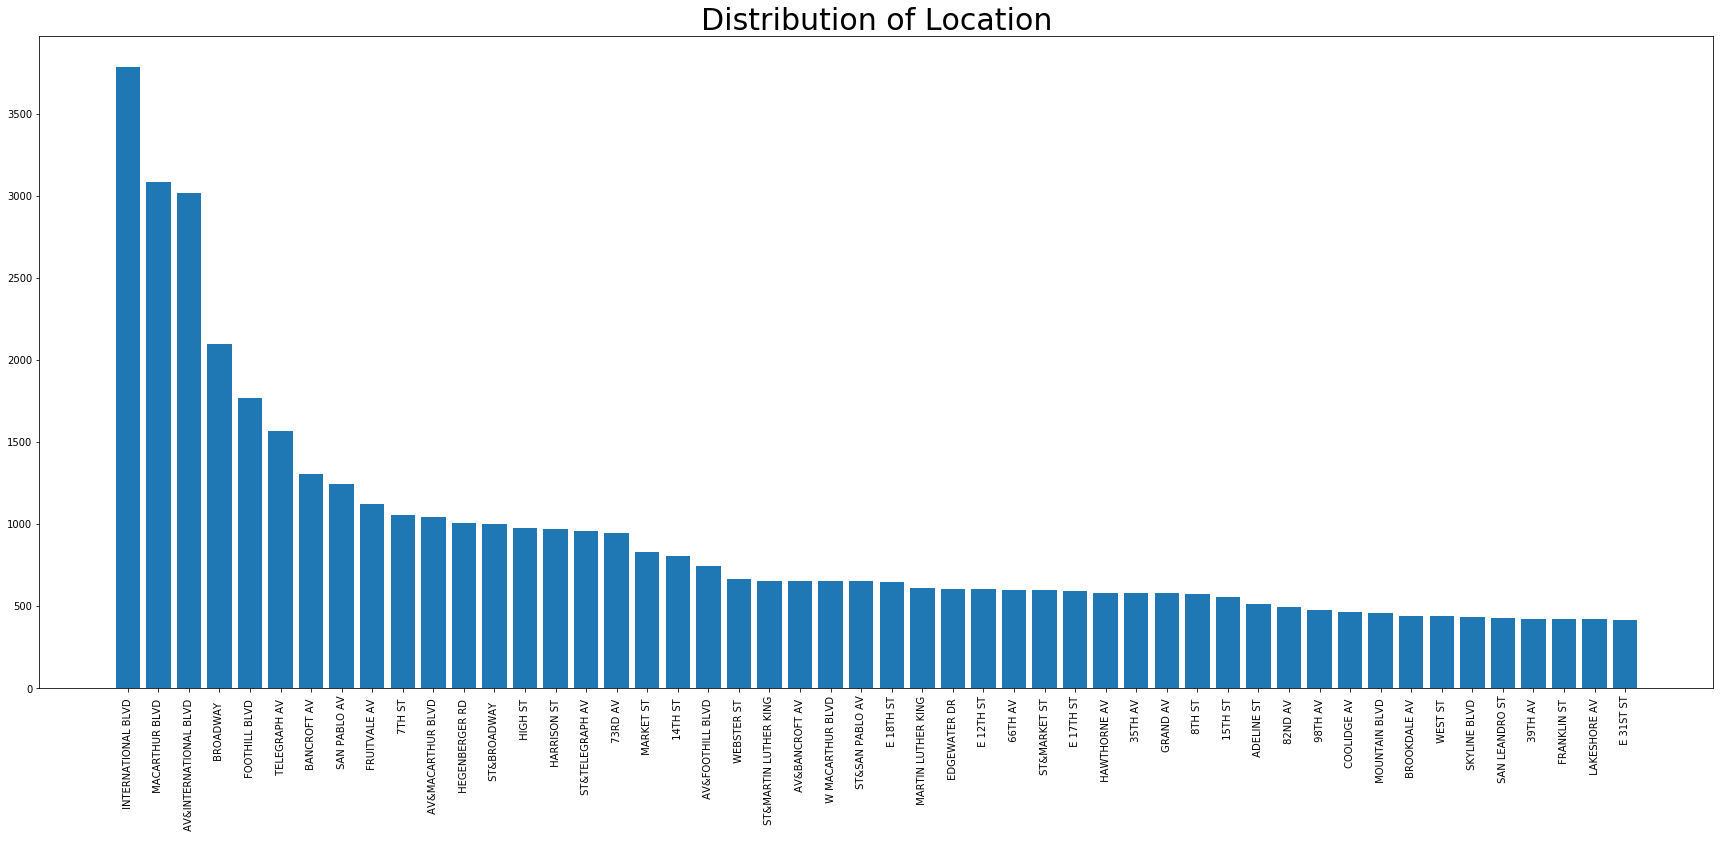

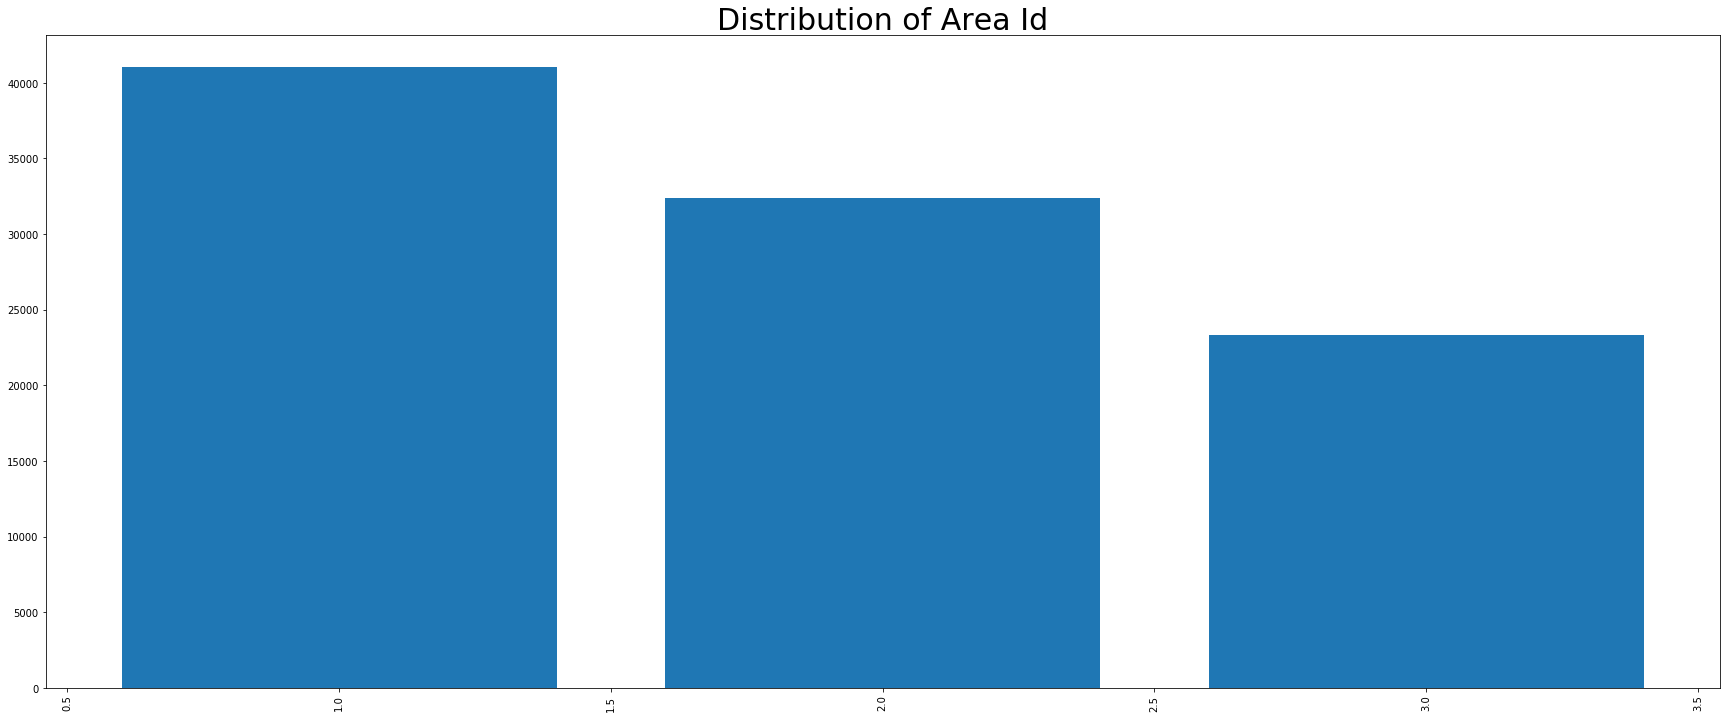

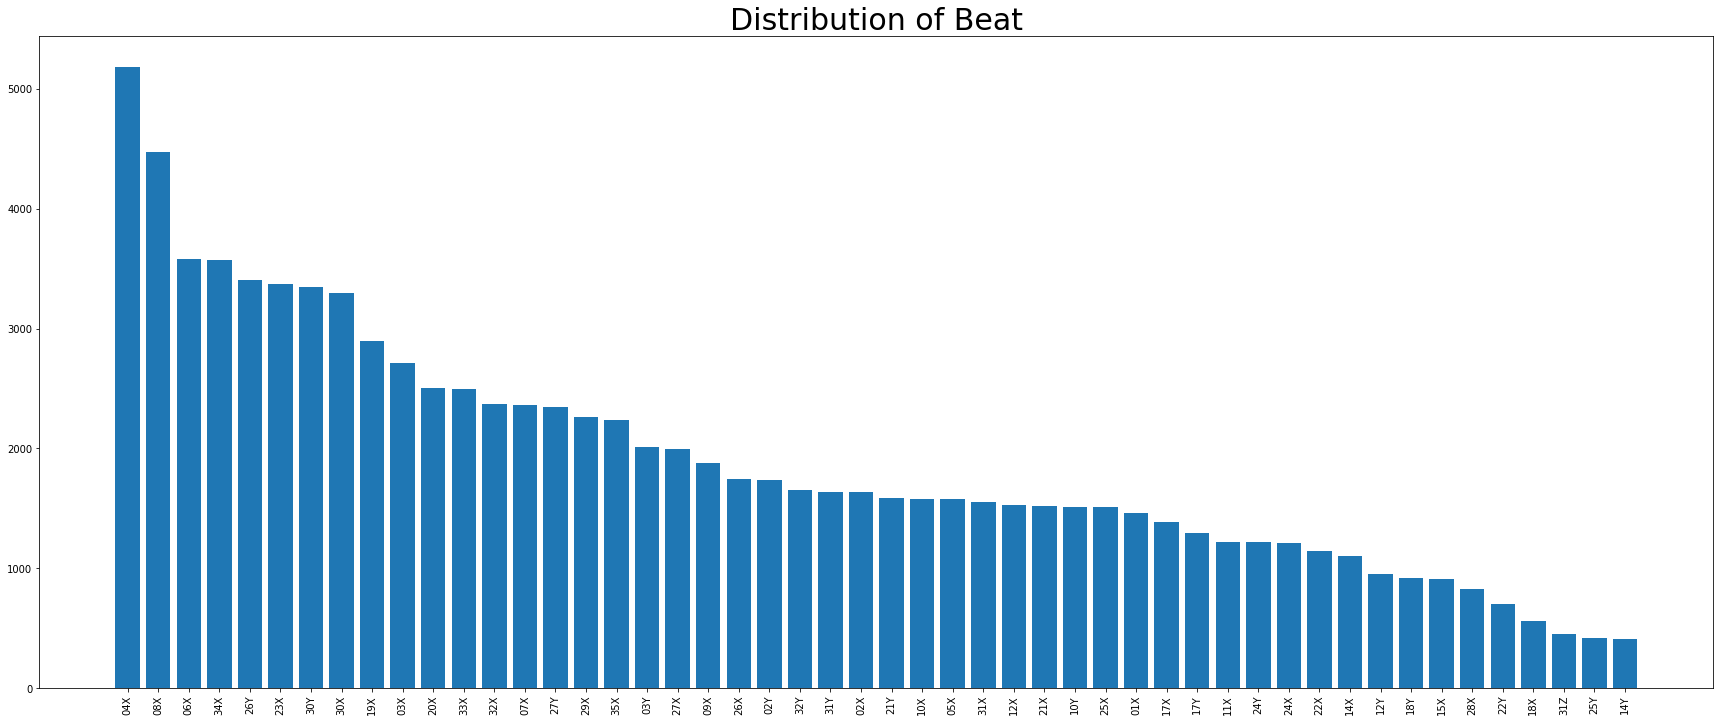

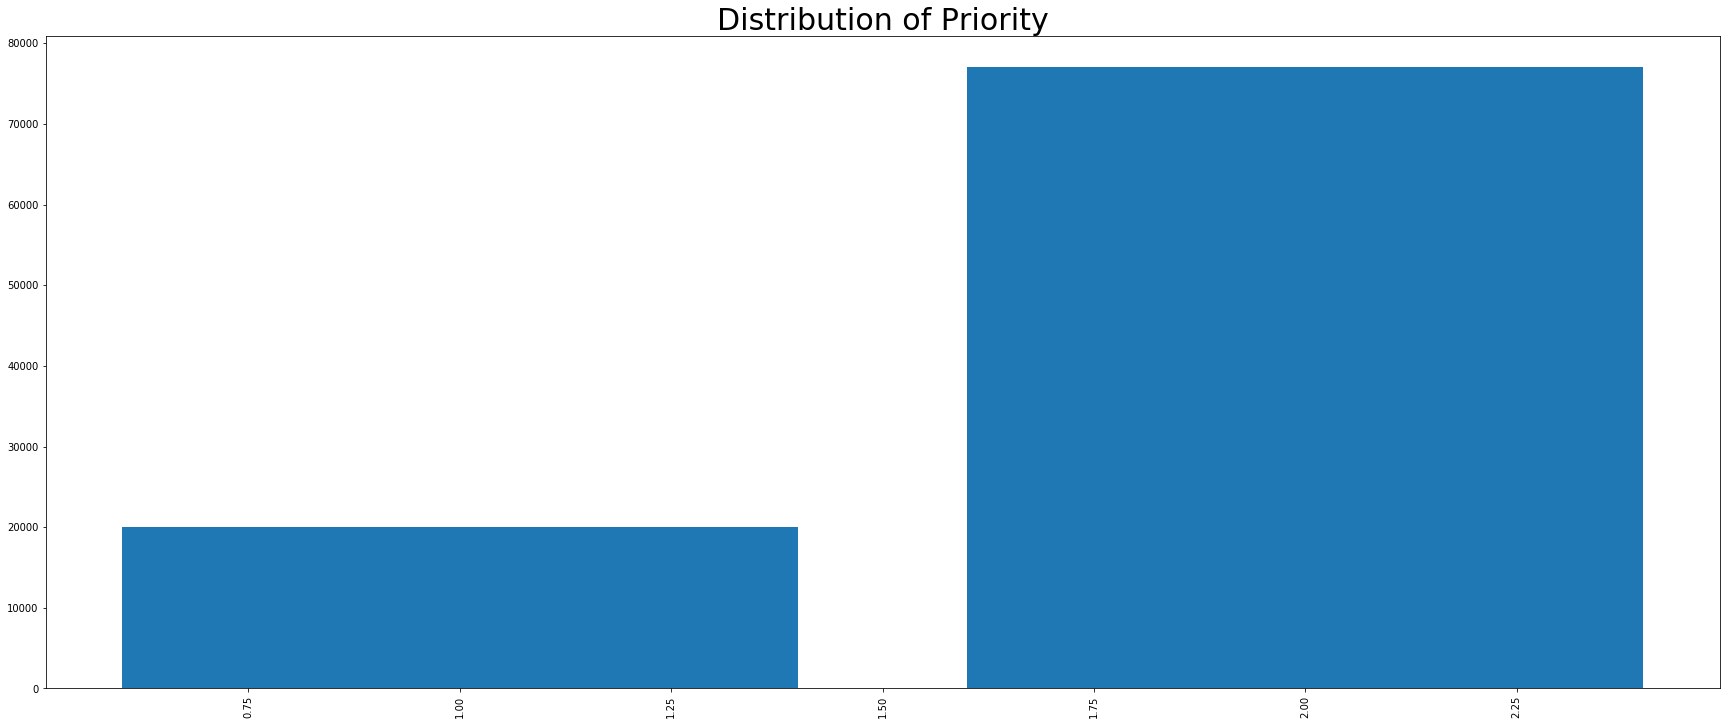

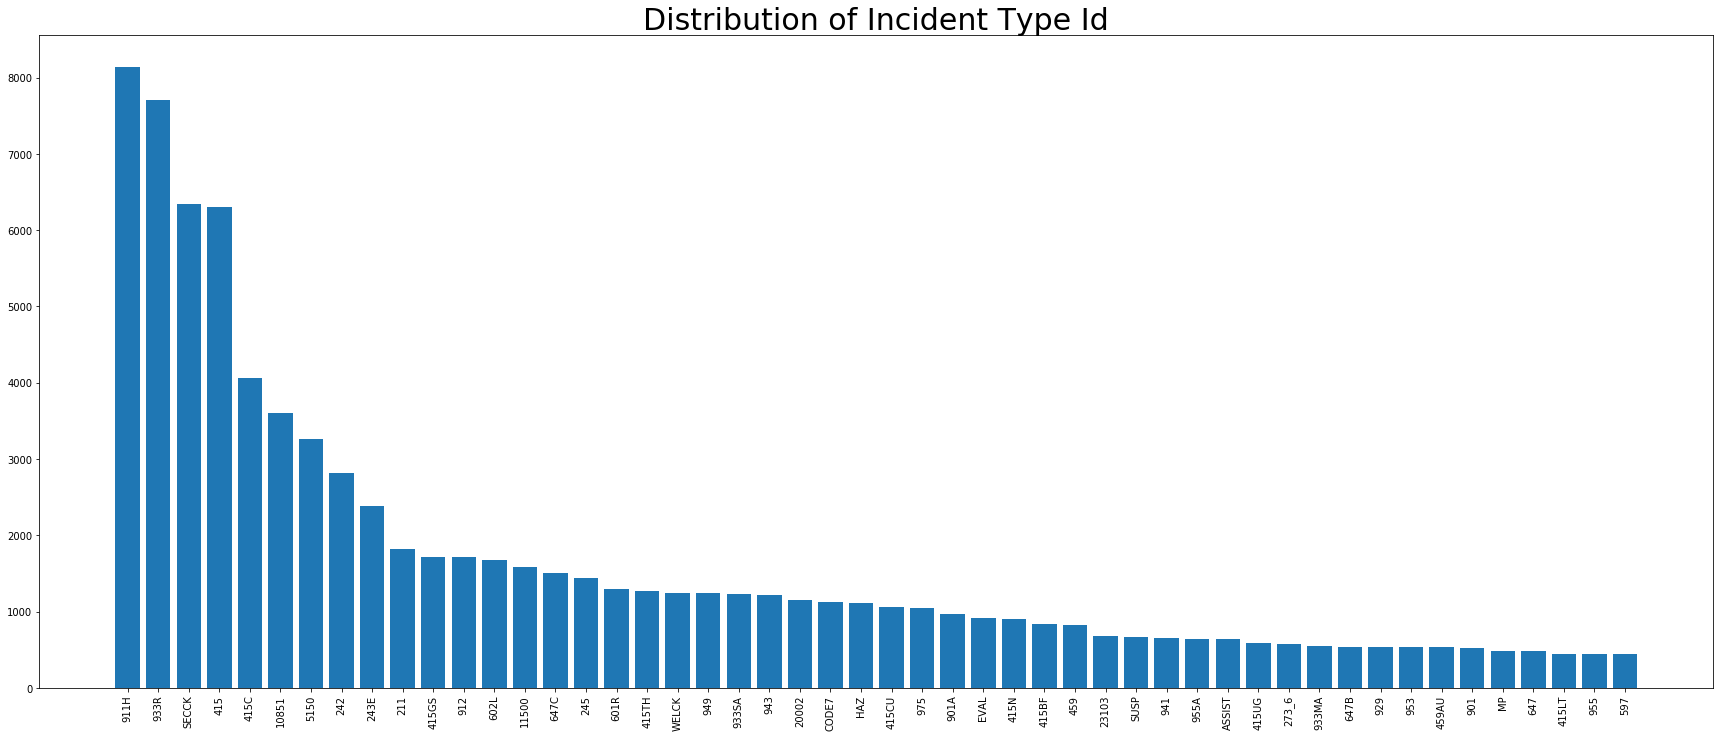

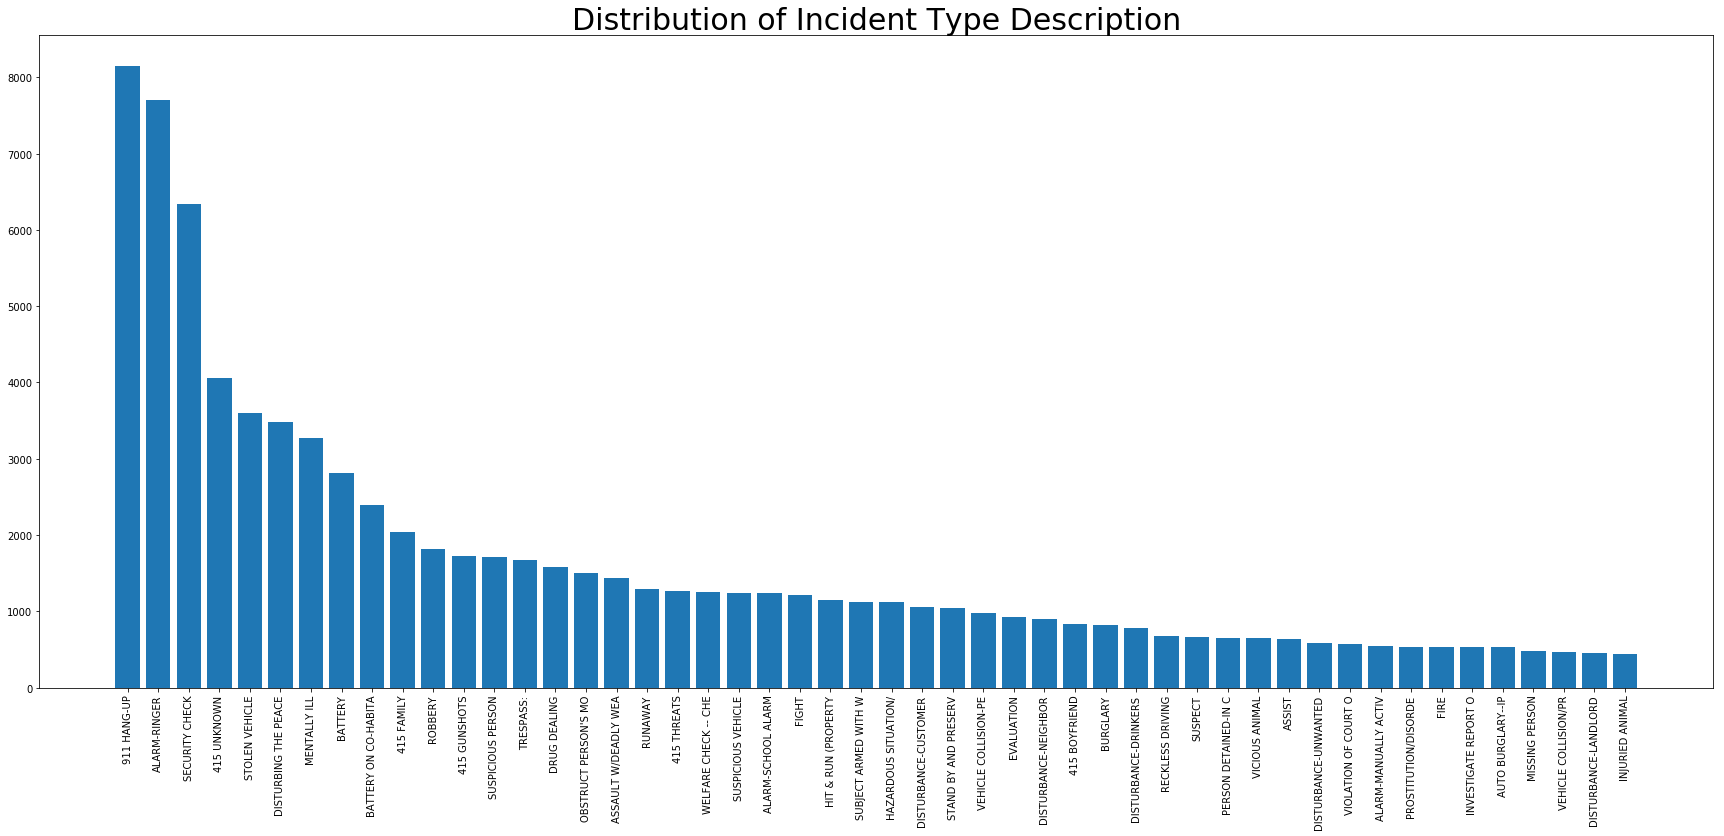

In [134]:
nominal_index=['Location','Area Id','Beat','Priority','Incident Type Id','Incident Type Description']
nominal_summary(df,nominal_index=nominal_index,head_n=50)

#### 数据可视化，使用盒图

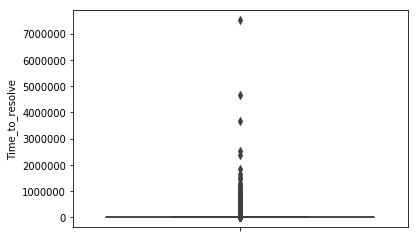

In [138]:
sns.boxplot(y='Time_to_resolve',data=df)
plt.show()

#### 可以看出原数据有过多离群点，根据五数剔除部分离群点

In [146]:
normal=(df['Time_to_resolve']<1e+05)
df=df[normal]

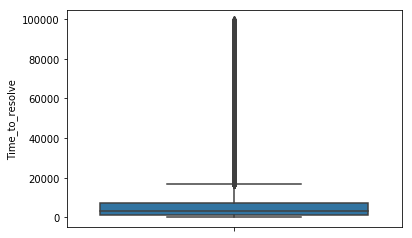

In [149]:
sns.boxplot(y='Time_to_resolve',data=df)
plt.show()

#### 缺失值处理，首先观察缺失值，可以看到Area Id和Beat存在缺失值，接下来创建四个缺失值副本，分别使用四种方式对每个副本进行填充

In [152]:
for key in df.keys():
    print("{:>30}:{} missing values".format(key,df[key].isna().sum()))

                      Location:0 missing values
                       Area Id:227 missing values
                          Beat:27 missing values
                      Priority:0 missing values
              Incident Type Id:0 missing values
     Incident Type Description:0 missing values
               Time_to_resolve:0 missing values


#### 直接将缺失值剔除

In [153]:
new_df=df.dropna()

In [154]:
for key in new_df.keys():
    print("{:>30}:{} missing values".format(key,new_df[key].isna().sum()))

                      Location:0 missing values
                       Area Id:0 missing values
                          Beat:0 missing values
                      Priority:0 missing values
              Incident Type Id:0 missing values
     Incident Type Description:0 missing values
               Time_to_resolve:0 missing values


#### 利用出现频率最高的数值进行填充

In [170]:
new_df=copy.deepcopy(df)
Area_fill=df['Area Id'].value_counts().index[0]
Area_list=df[df['Area Id'].isna()].index.values
for item in Area_list:
    new_df.loc[item,('Area Id')]=Area_fill
Beat_fill=df['Beat'].value_counts().index[0]
Beat_list=df[df['Beat'].isna()].index.values
for item in Beat_list:
    new_df.loc[item,('Beat')]=Beat_fill

In [171]:
for key in new_df.keys():
    print("{:>30}:{} missing values".format(key,new_df[key].isna().sum()))

                      Location:0 missing values
                       Area Id:0 missing values
                          Beat:0 missing values
                      Priority:0 missing values
              Incident Type Id:0 missing values
     Incident Type Description:0 missing values
               Time_to_resolve:0 missing values


#### 利用属性之间的相关关系进行填充，因为标称属性过多，且要填充的属性也是标称属性，因此选用树模型进行填充，这里选取Area Id进行填充

In [173]:
new_df=copy.deepcopy(df)

In [176]:
li=pd.DataFrame(new_df['Location'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['Location_id'] = new_df['Location'].map(dic)
li=pd.DataFrame(new_df['Incident Type Id'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['Incident_id'] = new_df['Incident Type Id'].map(dic)

In [181]:
nona=new_df.dropna()

In [183]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)
model.fit(nona[['Location_id','Priority','Incident_id','Time_to_resolve']],nona['Area Id'])

DecisionTreeRegressor(max_depth=5)

In [207]:
Area_list=list(Area_list)
for item in Area_list:
    new_df.loc[item,('Area Id')]=model.predict(np.array(new_df.loc[item][['Location_id','Priority','Incident_id','Time_to_resolve']]).reshape(-1,4))
for key in new_df.keys():
    print("{:>30}:{} missing values".format(key,new_df[key].isna().sum()))

                      Location:0 missing values
                       Area Id:0 missing values
                          Beat:27 missing values
                      Priority:0 missing values
              Incident Type Id:0 missing values
     Incident Type Description:0 missing values
               Time_to_resolve:0 missing values
                   Location_id:0 missing values
                   Incident_id:0 missing values
                         price:96522 missing values


#### 通过数据对象之间的相似性进行填充

In [212]:
new_df = copy.deepcopy(df)

In [213]:
li=pd.DataFrame(new_df['Location'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['Location_id'] = new_df['Location'].map(dic)
li=pd.DataFrame(new_df['Incident Type Id'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['Incident_id'] = new_df['Incident Type Id'].map(dic)

In [216]:
new_df=new_df[['Location_id','Incident_id','Area Id','Priority','Time_to_resolve']]

In [221]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5,weights='uniform')
result=pd.DataFrame(imputer.fit_transform(new_df))
result=result.rename(columns={0:'Location_id',1:'Incident_id',2:'Area Id',3:'Priority',4:'Time_to_resolve'})

In [223]:
for key in result.keys():
    print("{:>30}:{} missing values".format(key,result[key].isna().sum()))

                   Location_id:0 missing values
                   Incident_id:0 missing values
                       Area Id:0 missing values
                      Priority:0 missing values
               Time_to_resolve:0 missing values


## 数据集 Wine Reviews 处理

In [266]:
df=pd.read_csv("/home/wangguoyu910/conda_dataset/wine/winemag-data_first150k.csv")

In [267]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


#### 除去本次处理无关信息

In [269]:
df.drop(columns=['description','winery','Unnamed: 0','region_2'],inplace=True)

In [270]:
df.head()

,country,designation,points,price,province,region_1,variety
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir
4,France,La Brûlade,95,66.0,Provence,Bandol,Provence red blend


#### 获取标称属性频数

In [271]:
df['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [272]:
df['designation'].value_counts()

Reserve                                     2752
Reserva                                     1810
Estate                                      1571
Barrel sample                               1326
Riserva                                      754
                                            ... 
Anna de Codorniu Rosé                          1
The Professor's Classic                        1
Clos de Torribas Crianza                       1
La Corvée des Vignes                           1
Rive di Refrontolo Millesimato Extra Dry       1
Name: designation, Length: 30621, dtype: int64

In [273]:
df['province'].value_counts()

California        44508
Washington         9750
Tuscany            7281
Bordeaux           6111
Northern Spain     4892
                  ...  
Nevada                1
Elim                  1
Krania Olympus        1
Malgas                1
Pafos                 1
Name: province, Length: 455, dtype: int64

In [274]:
df['region_1'].value_counts()

Napa Valley                            6209
Columbia Valley (WA)                   4975
Mendoza                                3586
Russian River Valley                   3571
California                             3462
                                       ... 
Ventura County                            1
San Luis Obispo-Sonoma-Monterey           1
Alpilles                                  1
Vin de Pays des Pyrénees Orientales       1
Muscadet Sèvre et Maine Clisson           1
Name: region_1, Length: 1236, dtype: int64

In [275]:
df['variety'].value_counts()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Moscatel Graúdo                 1
Erbaluce                        1
Vitovska                        1
Sideritis                       1
Syrah-Malbec                    1
Name: variety, Length: 632, dtype: int64

#### 从上面的分析中可以看出，某些columns部分值占比过小，因此删除country、 designation、province、region_1、variety种类占比总数小于万分之五的数据

In [276]:
tmp=df['country'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['country'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

In [277]:
tmp=df['designation'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['designation'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

In [278]:
tmp=df['province'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['province'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

In [279]:
tmp=df['region_1'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['region_1'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

In [280]:
tmp=df['variety'].value_counts()<len(df)*0.0005
li=[]
for item in tmp.items():
    if(item[1]==False):
        li.append(item[0])
key=[]
value=[]
for item in df['variety'].items():
    key.append(item[0])
    if(item[1] in li):
        value.append(True)
    else:
        value.append(False)
normal=pd.Series(value,index=key)
df=df[normal]

#### 查看数值属性的五数属性

In [281]:
numerical=df[['points','price']]
numerical.describe()

,points,price
count,12485.000000,10154.000000
mean,88.219784,32.014182
std,3.449606,29.143217
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,38.000000
max,100.000000,900.000000


#### 查看属性缺失值，可以看出仅数值属性price具有缺失值

In [282]:
for key in df.keys():
    print("{:>20}:{} missing values".format(key,df[key].isna().sum()))

             country:0 missing values
         designation:0 missing values
              points:0 missing values
               price:2331 missing values
            province:0 missing values
            region_1:0 missing values
             variety:0 missing values


#### 数据可视化，使用直方图

In [284]:
def nominal_summary(df,nominal_index,head_n=50,):
    def bar_describe(data,new_data=None,head_n=50):
        plt.figure(figsize=(30,12))
        plt.title("Distribution of {}".format(data.name), fontsize=30)    
        plt.bar(data.index[:head_n], data.values[:head_n])
        plt.xticks(rotation=90)
        plt.show()

    frequency = {key: df[key].value_counts() for key in df.columns}
    for key in nominal_index:
        bar_describe(data=frequency[key],head_n=head_n)
    return None

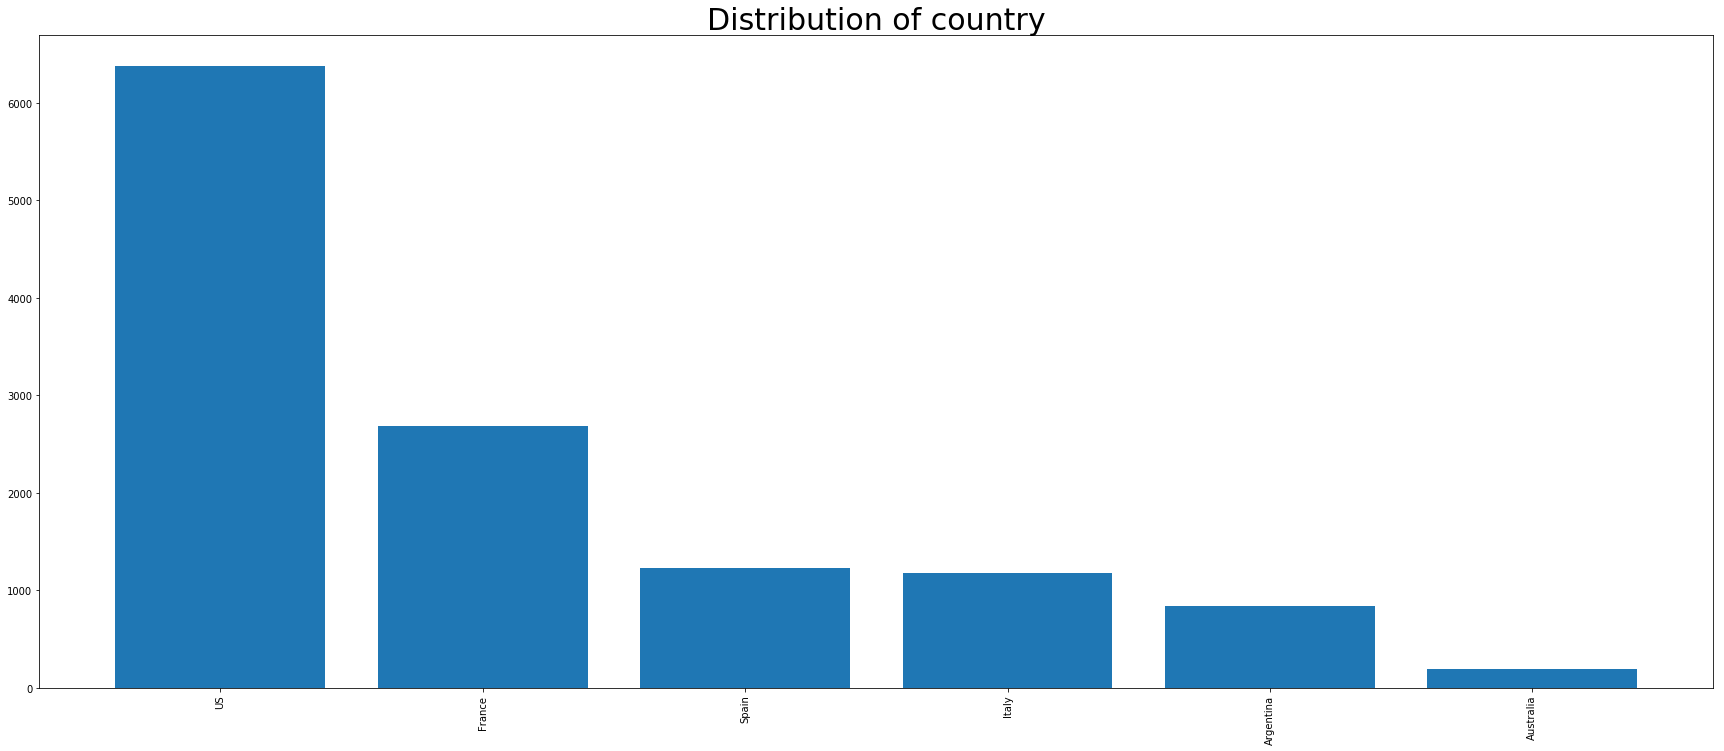

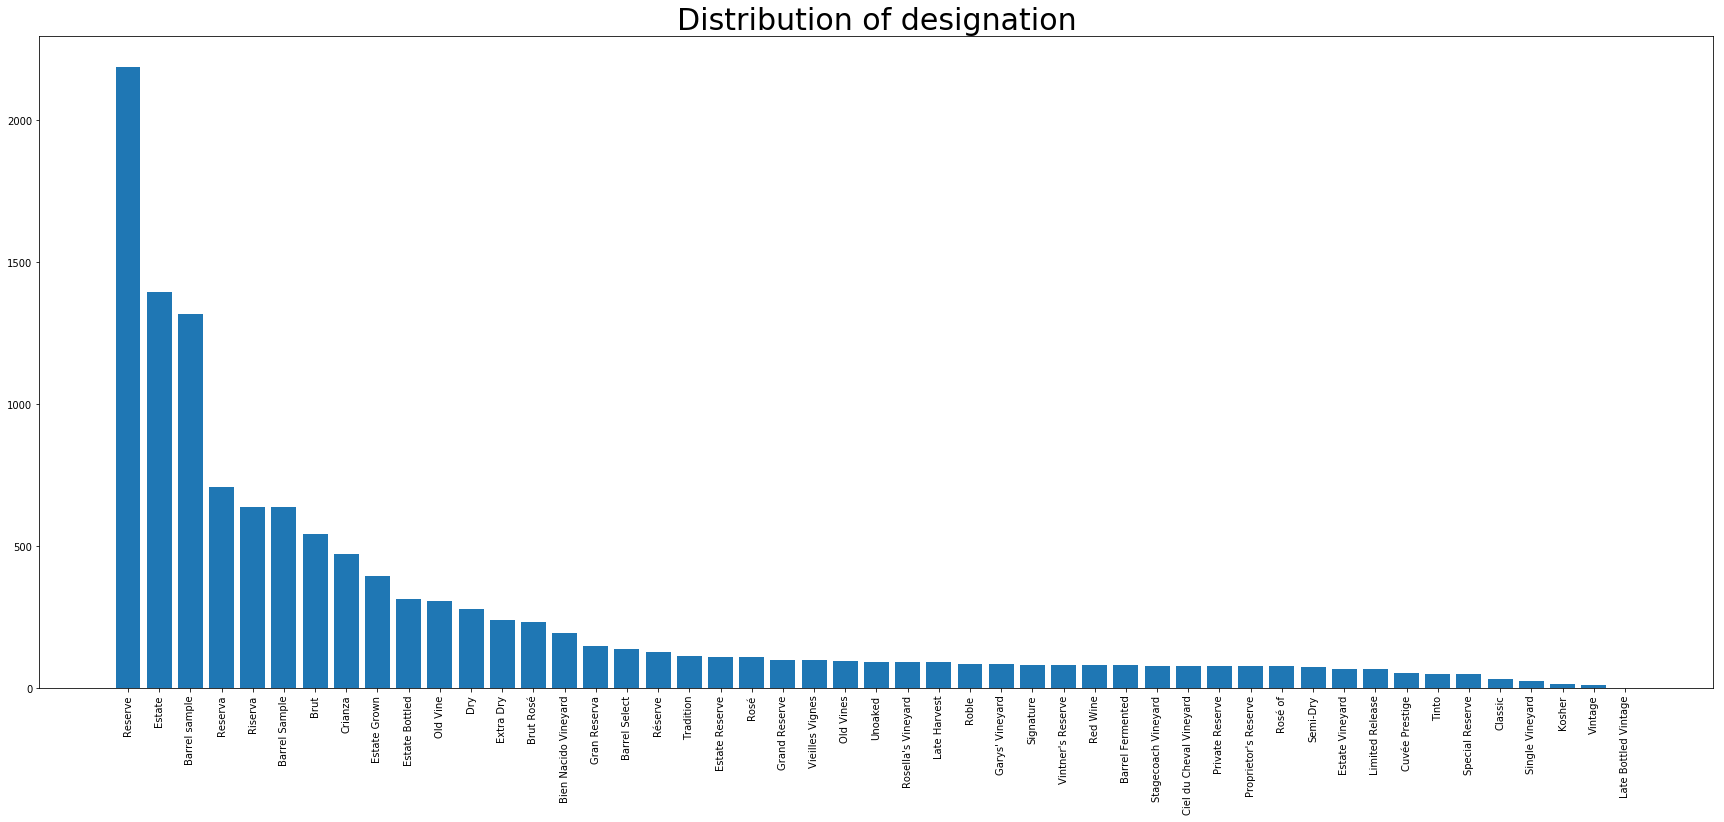

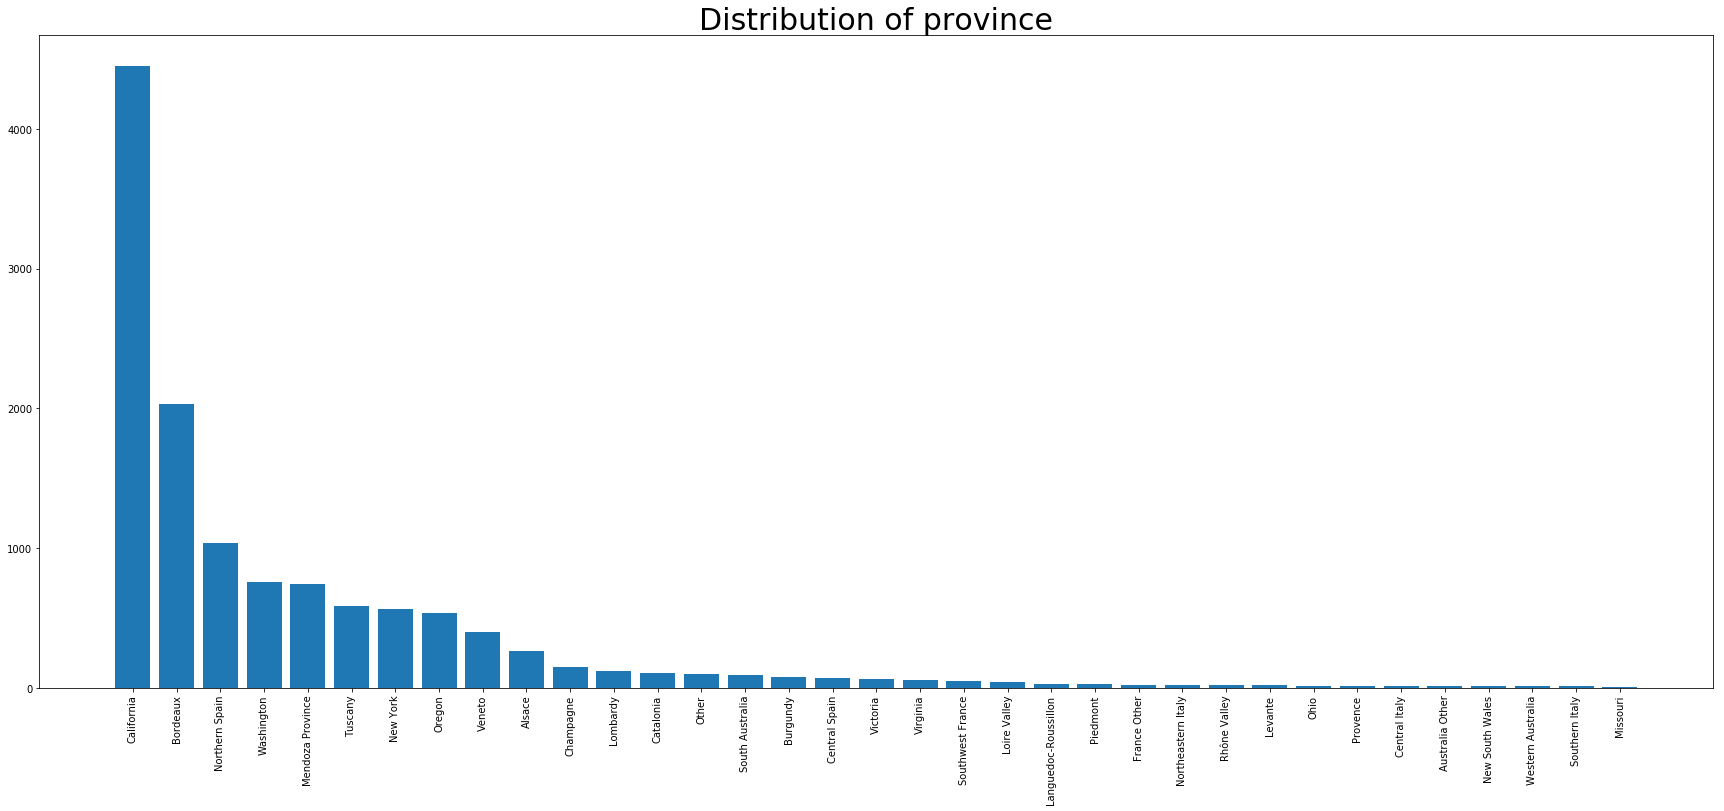

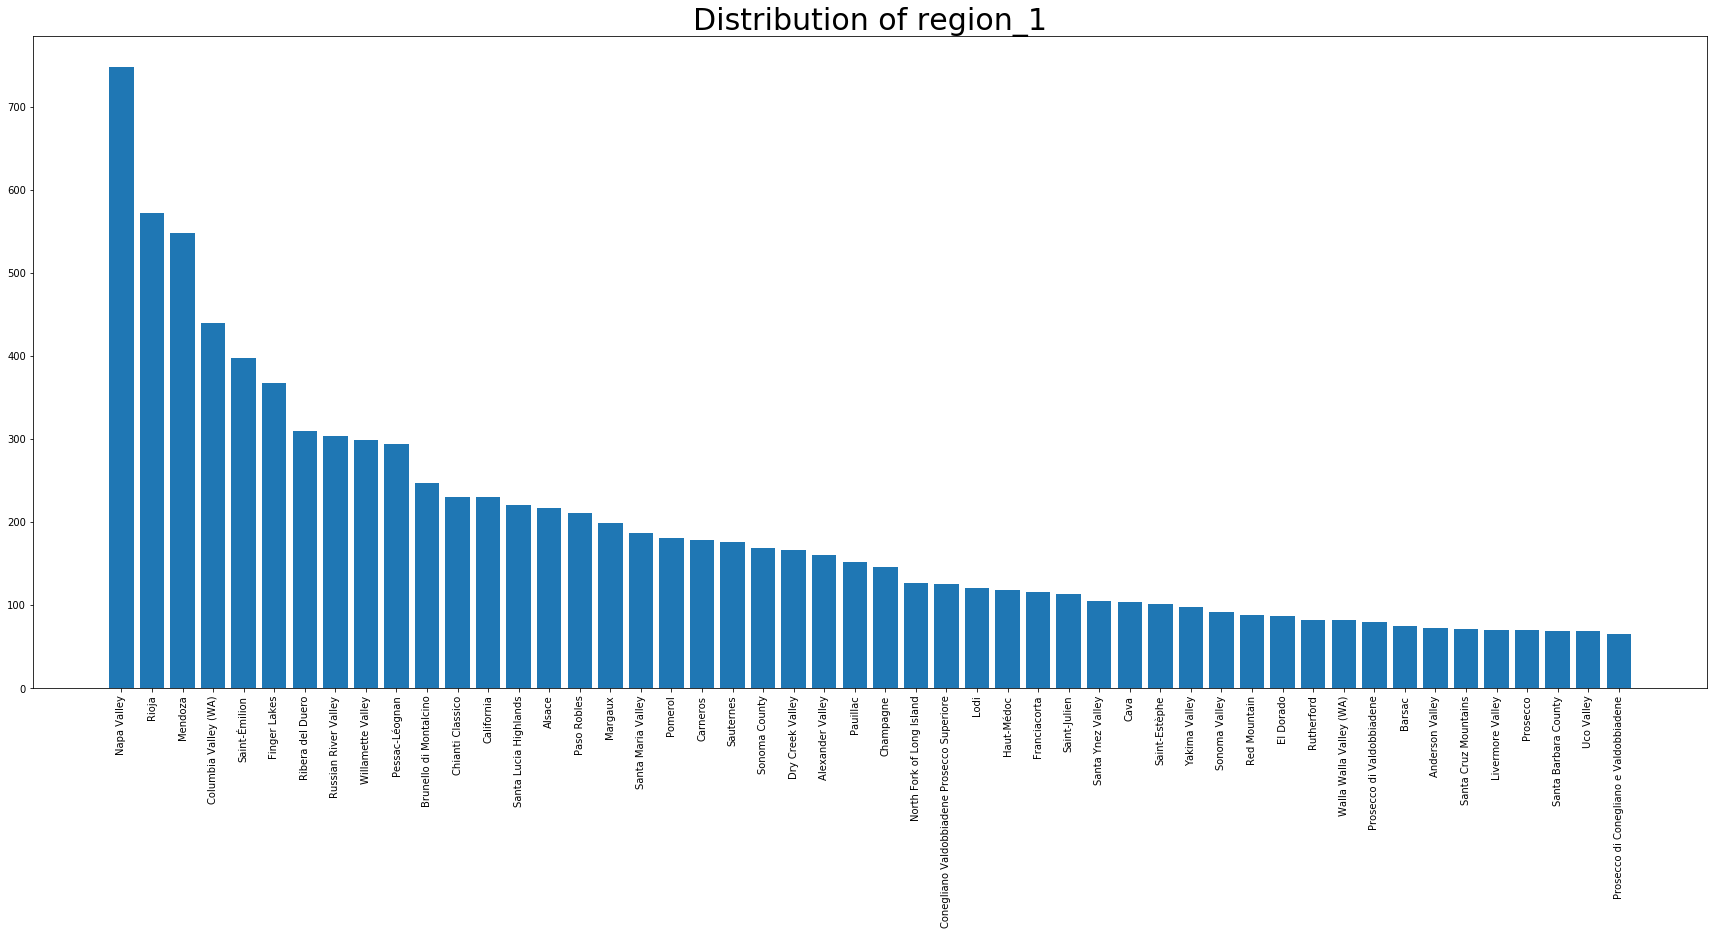

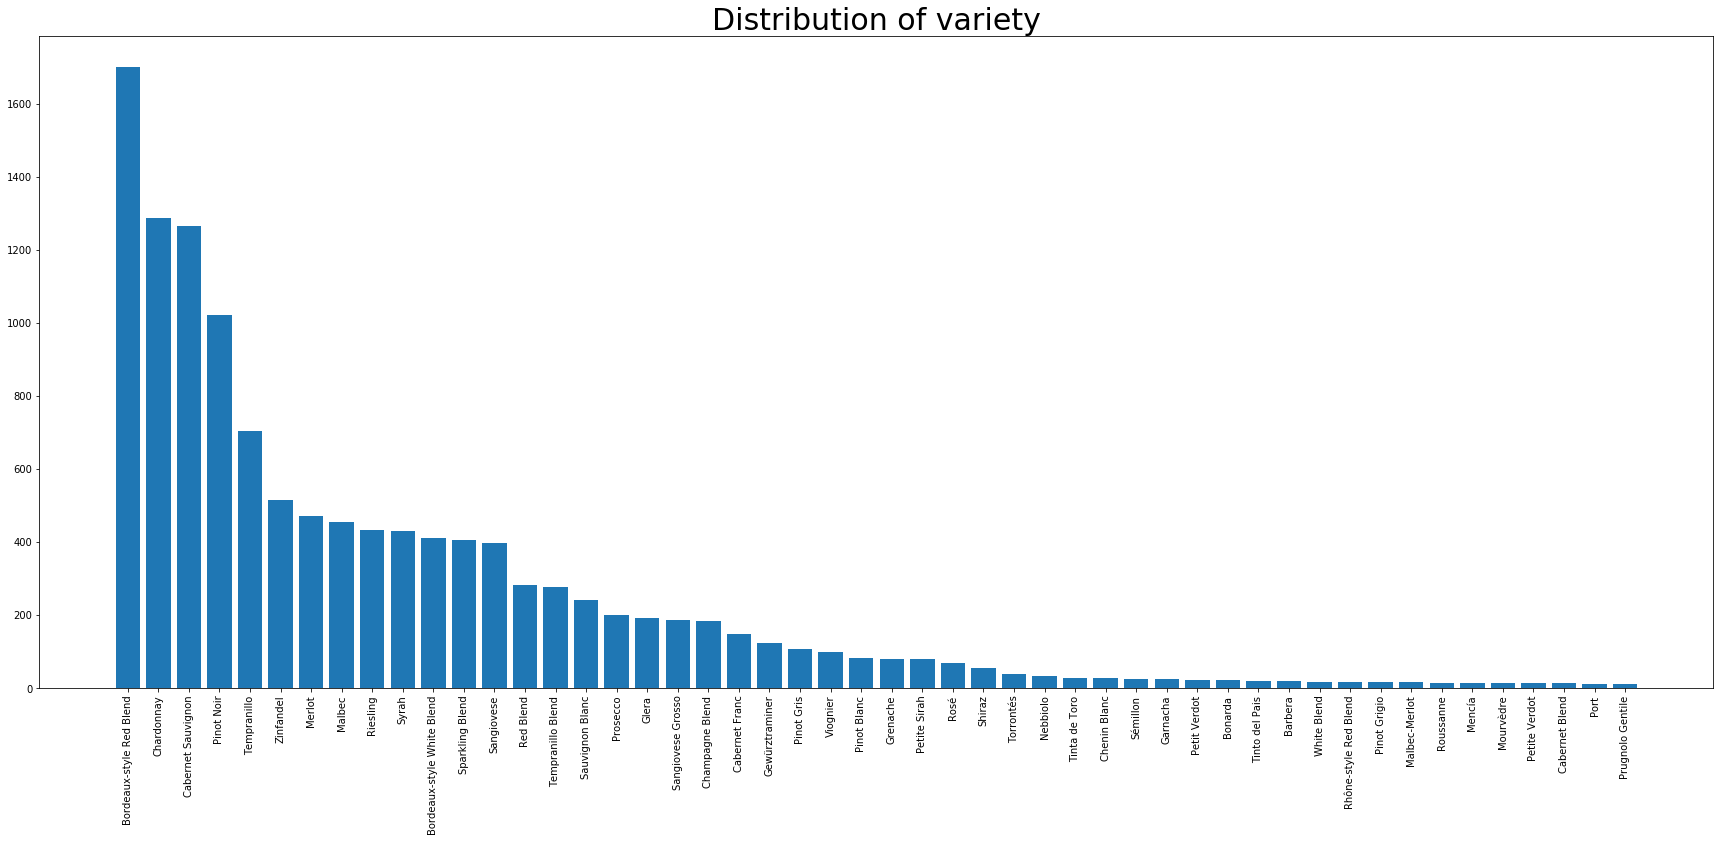

In [285]:
nominal_index=['country','designation','province','region_1','variety']
nominal_summary(df,nominal_index=nominal_index,head_n=50)

#### 数据可视化，使用盒图

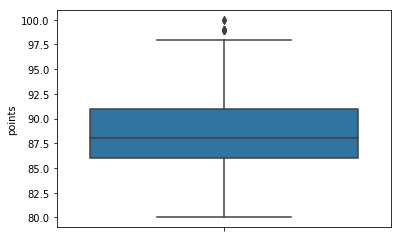

In [287]:
sns.boxplot(y='points',data=df)
plt.show()

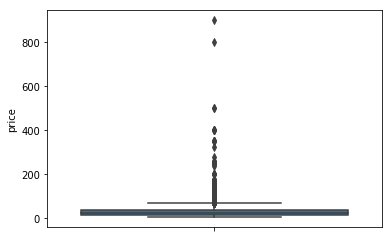

In [288]:
sns.boxplot(y='price',data=df)
plt.show()

#### 缺失值处理，首先观察缺失值，可以看到price存在缺失值，接下来创建四个缺失值副本，分别使用四种方式对每个副本进行填充

In [289]:
for key in df.keys():
    print("{:>30}:{} missing values".format(key,df[key].isna().sum()))

                       country:0 missing values
                   designation:0 missing values
                        points:0 missing values
                         price:2331 missing values
                      province:0 missing values
                      region_1:0 missing values
                       variety:0 missing values


#### 直接剔除缺失值

In [316]:
new_df=copy.deepcopy(df)

In [317]:
new_df=df.dropna()

In [318]:
for key in df.keys():
    print("{:>30}:{} missing values".format(key,new_df[key].isna().sum()))

                       country:0 missing values
                   designation:0 missing values
                        points:0 missing values
                         price:0 missing values
                      province:0 missing values
                      region_1:0 missing values
                       variety:0 missing values


#### 利用出现频率最高的值进行填充

In [290]:
new_df=copy.deepcopy(df)
Area_fill=df['price'].value_counts().index[0]
Area_list=df[df['price'].isna()].index.values
for item in Area_list:
    new_df.loc[item,('price')]=Area_fill

In [292]:
for key in df.keys():
    print("{:>30}:{} missing values".format(key,new_df[key].isna().sum()))

                       country:0 missing values
                   designation:0 missing values
                        points:0 missing values
                         price:0 missing values
                      province:0 missing values
                      region_1:0 missing values
                       variety:0 missing values


#### 利用属性之间的相关关系进行填充，选用树模型进行填充

In [294]:
new_df=copy.deepcopy(df)

In [296]:
li=pd.DataFrame(new_df['country'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['country_id'] = new_df['country'].map(dic)

li=pd.DataFrame(new_df['designation'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['designation_id'] = new_df['designation'].map(dic)

li=pd.DataFrame(new_df['province'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['province_id'] = new_df['province'].map(dic)

li=pd.DataFrame(new_df['region_1'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['region_id'] = new_df['region_1'].map(dic)

li=pd.DataFrame(new_df['variety'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['variety_id'] = new_df['variety'].map(dic)

In [297]:
new_df.head()

,country,designation,points,price,province,region_1,variety,country_id,designation_id,province_id,region_id,variety_id
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,0,0,7,8,3
28,US,Garys' Vineyard,94,60.0,California,Santa Lucia Highlands,Pinot Noir,0,28,0,13,3
35,Italy,Riserva,90,135.0,Tuscany,Brunello di Montalcino,Sangiovese,3,4,5,10,12
39,Italy,Riserva,90,29.0,Tuscany,Chianti Classico,Red Blend,3,4,5,11,13
43,Italy,Riserva,90,39.0,Tuscany,Chianti Classico,Red Blend,3,4,5,11,13


In [298]:
nona=new_df.dropna()

In [299]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)
model.fit(nona[['country_id','designation_id','province_id','region_id','variety_id','points']],nona['price'])

DecisionTreeRegressor(max_depth=5)

In [300]:
Area_list=list(Area_list)
for item in Area_list:
    new_df.loc[item,('price')]=model.predict(np.array(new_df.loc[item][['country_id','designation_id','province_id','region_id','variety_id','points']]).reshape(-1,6))
for key in new_df.keys():
    print("{:>30}:{} missing values".format(key,new_df[key].isna().sum()))

                       country:0 missing values
                   designation:0 missing values
                        points:0 missing values
                         price:0 missing values
                      province:0 missing values
                      region_1:0 missing values
                       variety:0 missing values
                    country_id:0 missing values
                designation_id:0 missing values
                   province_id:0 missing values
                     region_id:0 missing values
                    variety_id:0 missing values


#### 利用数据之间的相关关系进行填充

In [309]:
new_df = copy.deepcopy(df)

In [310]:
li=pd.DataFrame(new_df['country'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['country_id'] = new_df['country'].map(dic)

li=pd.DataFrame(new_df['designation'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['designation_id'] = new_df['designation'].map(dic)

li=pd.DataFrame(new_df['province'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['province_id'] = new_df['province'].map(dic)

li=pd.DataFrame(new_df['region_1'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['region_id'] = new_df['region_1'].map(dic)

li=pd.DataFrame(new_df['variety'].value_counts(dropna=True)).index.values
dic={}
i=0
for item in li:
    dic[item]=i
    i=i+1
    
new_df['variety_id'] = new_df['variety'].map(dic)

In [311]:
new_df.head()

,country,designation,points,price,province,region_1,variety,country_id,designation_id,province_id,region_id,variety_id
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,0,0,7,8,3
28,US,Garys' Vineyard,94,60.0,California,Santa Lucia Highlands,Pinot Noir,0,28,0,13,3
35,Italy,Riserva,90,135.0,Tuscany,Brunello di Montalcino,Sangiovese,3,4,5,10,12
39,Italy,Riserva,90,29.0,Tuscany,Chianti Classico,Red Blend,3,4,5,11,13
43,Italy,Riserva,90,39.0,Tuscany,Chianti Classico,Red Blend,3,4,5,11,13


In [312]:
new_df=new_df[['country_id','designation_id','province_id','region_id','variety_id','points','price']]

In [314]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=8,weights='uniform')
result=pd.DataFrame(imputer.fit_transform(new_df))
result=result.rename(columns={0:'country_id',1:'designation_id',2:'province_id',3:'region_id',4:'variety_id',5:'points',6:'price'})

In [315]:
for key in new_df.keys():
    print("{:>30}:{} missing values".format(key,result[key].isna().sum()))

                    country_id:0 missing values
                designation_id:0 missing values
                   province_id:0 missing values
                     region_id:0 missing values
                    variety_id:0 missing values
                        points:0 missing values
                         price:0 missing values
